# Group 142 Problem statement 6
<hr><br>
This dataset is one that has been artificially created to seem like weather data for the sake of 
classification procedures. It takes into account a wide range of aspects that are associated with 
the weather such as temperature, humidity, precipitation, cloud cover, season etc. and divides 
the weather into the 4 distinct categories. We need to perfrom, data visualization, data pre-processing 
and model training on it.

## <u> Team members </u>

| Name  | Bits Id |
|:------|:---------|
| HRISHIKESH MALAKAR | 2023Ac05058 |
| NAIR ANIT KAVALIBALAN | 2023ac05503 |
| ANUP JINDAL | 2023ac05472 |





## 1. Importing libraries and necessary dataset.
<hr>

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

weather_data = pd.read_csv('./weather_classification_data.csv')

## 2. Data visualization and exploration
<hr>

In [2]:
### Printing random two rows

## Select two random rows
random_rows = weather_data.sample(n=2)

## Print in good format
print(random_rows.to_string(index=False))


 Temperature  Humidity  Wind Speed  Precipitation (%) Cloud Cover  Atmospheric Pressure  UV Index Season  Visibility (km) Location Weather Type
           4        78        16.5                 90    overcast                986.07         0 Winter              4.5 mountain        Snowy
          15        97        12.5                 79    overcast               1003.91         0 Spring              1.5 mountain        Rainy


In [3]:

# Encoding categorical variables like Cloud Cover, Season, and Location to numeric values.

weather_data_copy = weather_data.copy()
# Map 'Cloud Cover' to numeric values
weather_data_copy['Cloud Cover'] = weather_data_copy['Cloud Cover'].map({
    'clear': 0, 
    'partly cloudy': 1, 
    'cloudy': 2, 
    'overcast': 3
})

weather_data_copy['Season'] = weather_data_copy['Season'].map({
    'Winter': 0,
    'Spring': 1,
    'Summer': 2,
    'Autumn': 3
})

# Map 'Location' to numeric values
weather_data_copy['Location'] = weather_data_copy['Location'].map({
    'inland': 0, 
    'coastal': 1, 
    'mountain': 2
})

# Map 'Weather Type' to numeric values
weather_data_copy['Weather Type'] = weather_data_copy['Weather Type'].map({
    'Sunny': 0, 
    'Cloudy': 1, 
    'Rainy': 2,
    'Snowy': 3
})
print(weather_data_copy.head().to_string(index=False))


 Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  Weather Type
          14        73         9.5                 82            1               1010.82         2       0              3.5         0             2
          39        96         8.5                 71            1               1011.43         7       1             10.0         0             1
          30        64         7.0                 16            0               1018.72         5       1              5.5         2             0
          38        83         1.5                 82            0               1026.25         7       1              1.0         1             0
          27        74        17.0                 66            3                990.67         1       0              2.5         2             2


#### Data Visiuliztaion using histogram.

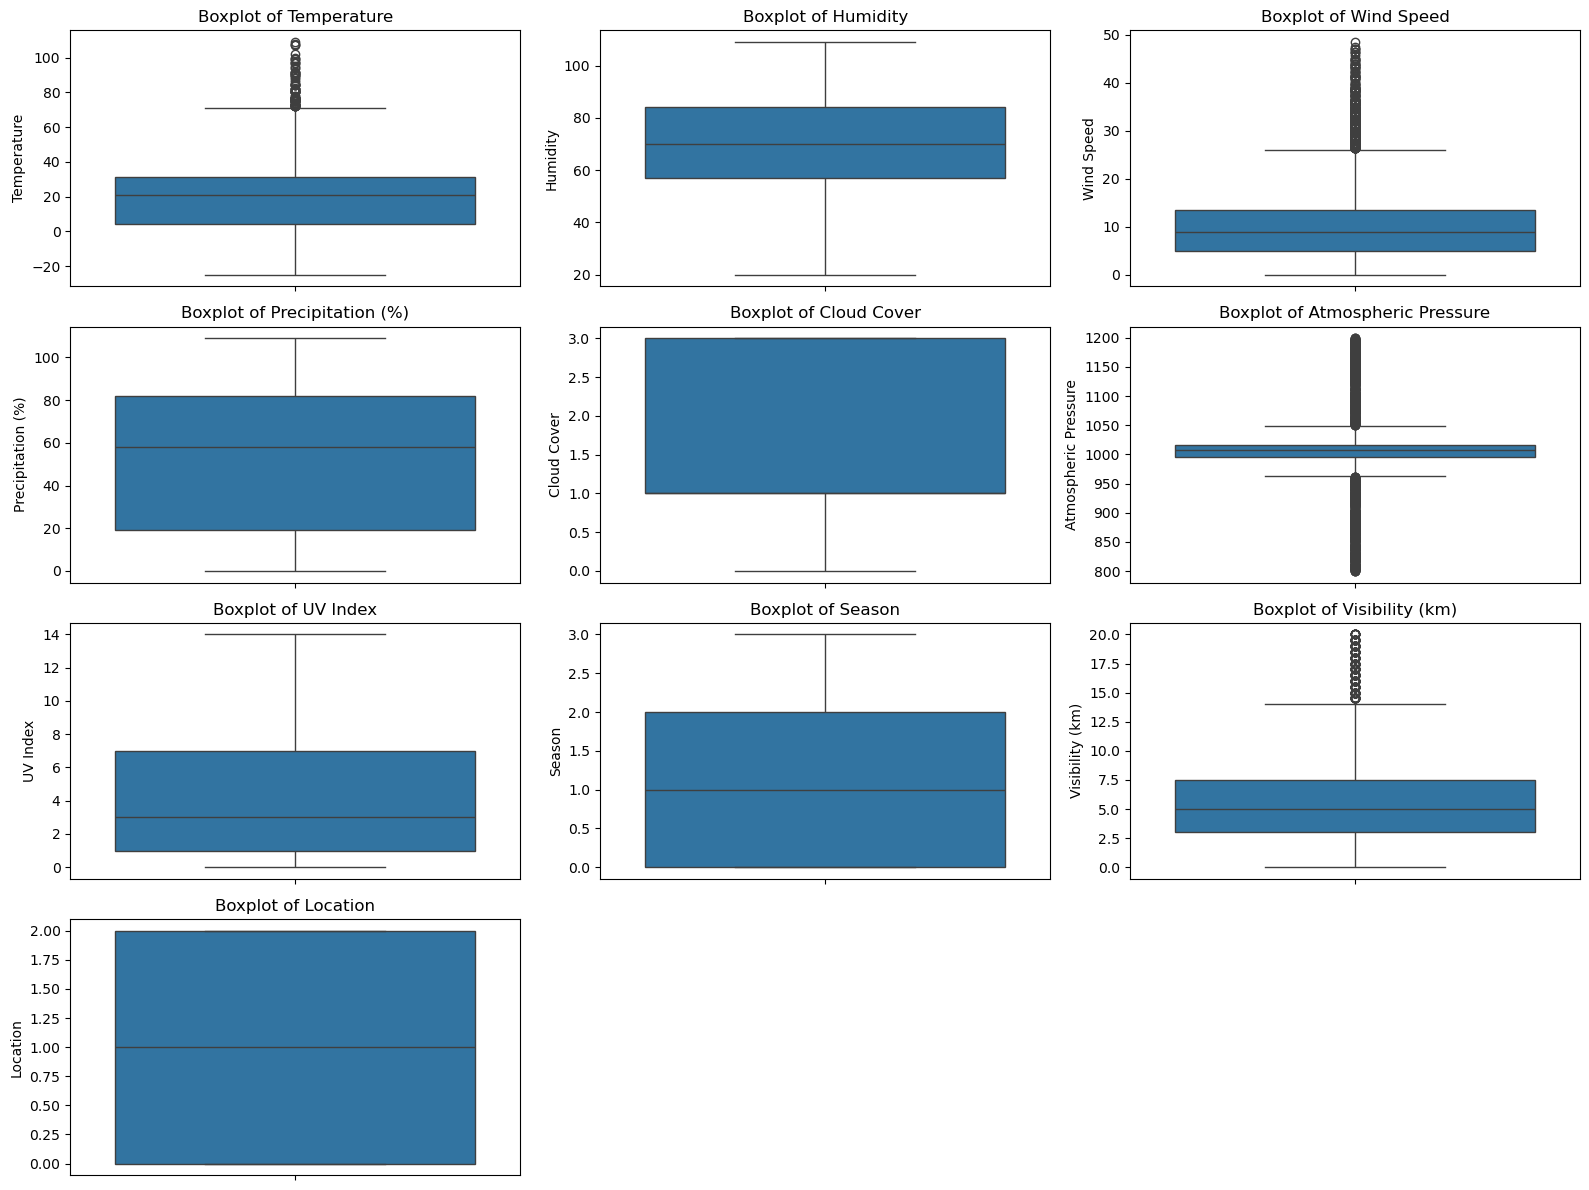

In [4]:

plt.figure(figsize = (16, 12))

# Iterate over all columns in the DataFrame and create boxplots
for i, col in enumerate(weather_data_copy.columns, 1):

    if col == 'Weather Type':
        continue
    plt.subplot(4, 3, i)  # Adjust the number of rows and columns as needed
    sns.boxplot(y=weather_data_copy[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

#### Overvations from the box plot.


- It can be seen that the **Temperature**, **Wind Speed**, **Atmospheric Pressure**, **Visibility** has some outliers present in them.
    - **Temperature**: The temprature above 75 degrees doesnot seem to be in celcius. The temprature above 75 degrees can be converted to celcius.
    - **Wind Speed**: Wind speed upto 50km\hr is can be considered for rainy season if there is a strong rainfall.
    - **Atomospheric Pressure**: A relatively narrow range with a few potential outliers on both ends. The distribution is fairly centered.
    - **Visibility**: A wide range with potential outliers in the lower visibility range. The distribution is skewed towards higher visibility.
- **Range of Data**:
    Some variables have a very wide range (e.g., Temperature, Wind Speed, Visibility), while others have a narrower range (e.g., UV Index). This might require normalization or standardization for certain analyses.
  


In [5]:
#### Correlation Analysis

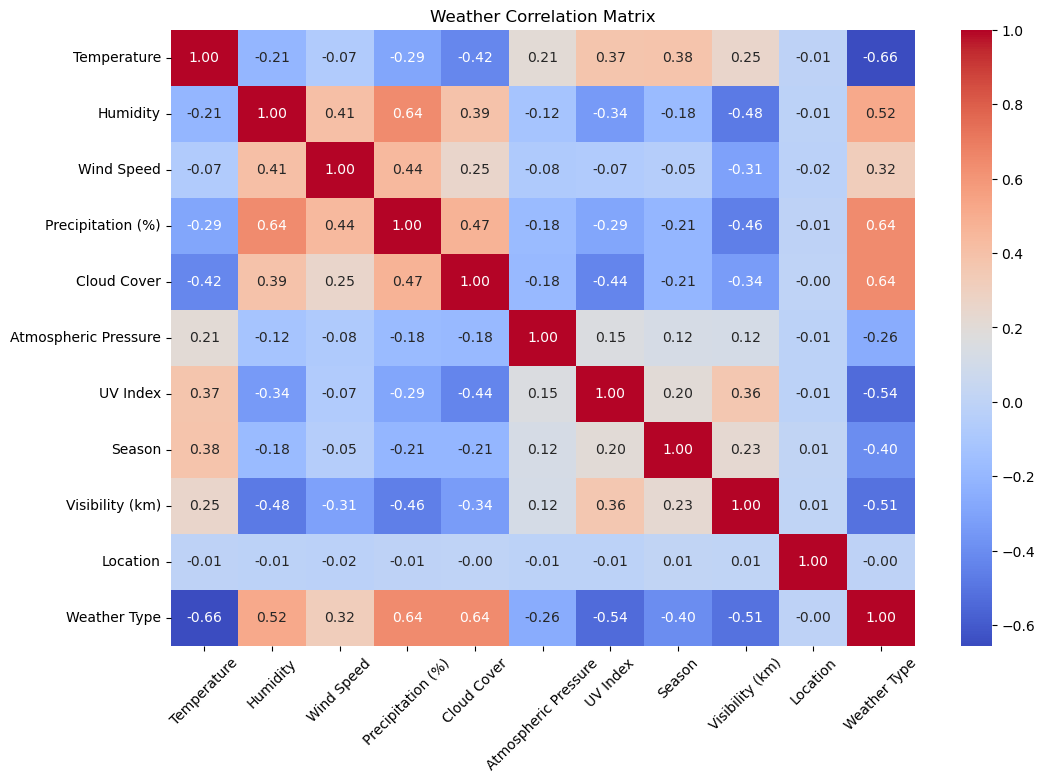

In [6]:
# Compute correlation matrix
corr_matrix = weather_data_copy.corr()

# Plot heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)

# Set plot title
plt.title('Weather Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

**Positive Correlations**:
- Humidity, Precipitation (%), Cloud Cover, and Weather Type have strong positive correlations. This indicates that higher humidity, precipitation, and Cloud cover are associated with certain weather types (likely rainy or snowy).

**Negative Correlations**:
- Temperature and Weather Type have a strong negative correlation, suggesting lower temperatures are associated with certain weather types (likely snowy).
- Visibility (km) and Weather Type have a strong negative correlation, suggesting lower visibility is associated with specific weather conditions.

Alsom precipitation and cloud cover seems to have same correlation with weather type about 64% so, we can consider one of them. Here we will consider
percipitation.

Hence, based on the correlation matrix, the following features will be considered for prediction:
- Humidity
- Cloud Cover
- Temperature
- Visibility

## 3. Data Pre-processing and cleaning 

#### 1. Selecting on humidity, cloud cover, temperature and visibility, dropping other columns

In [7]:
weather_data_copy.drop(['Wind Speed', 'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season', 'Location'],  axis=1, inplace=True)
print(weather_data_copy.to_string(index=False))


 Temperature  Humidity  Precipitation (%)  Visibility (km)  Weather Type
          14        73                 82              3.5             2
          39        96                 71             10.0             1
          30        64                 16              5.5             0
          38        83                 82              1.0             0
          27        74                 66              2.5             2
          32        55                 26              5.0             1
          -2        97                 86              4.0             3
           3        85                 96              3.5             3
           3        83                 66              1.0             3
          28        74                107              7.5             0
          35        45                 86              1.0             1
          38        43                 16              7.5             0
          12        59                 25          

#### Check for null Values

In [8]:
# Check for null values
null_values = weather_data_copy.isnull().values.any()
if null_values:
    print('Null values present, need to process them')
else:
    print('No null values')

No null values


#### Checking if all data types are ok.

In [9]:
weather_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        13200 non-null  int64  
 1   Humidity           13200 non-null  int64  
 2   Precipitation (%)  13200 non-null  int64  
 3   Visibility (km)    13200 non-null  float64
 4   Weather Type       13200 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 515.8 KB


#### Handling Outliers

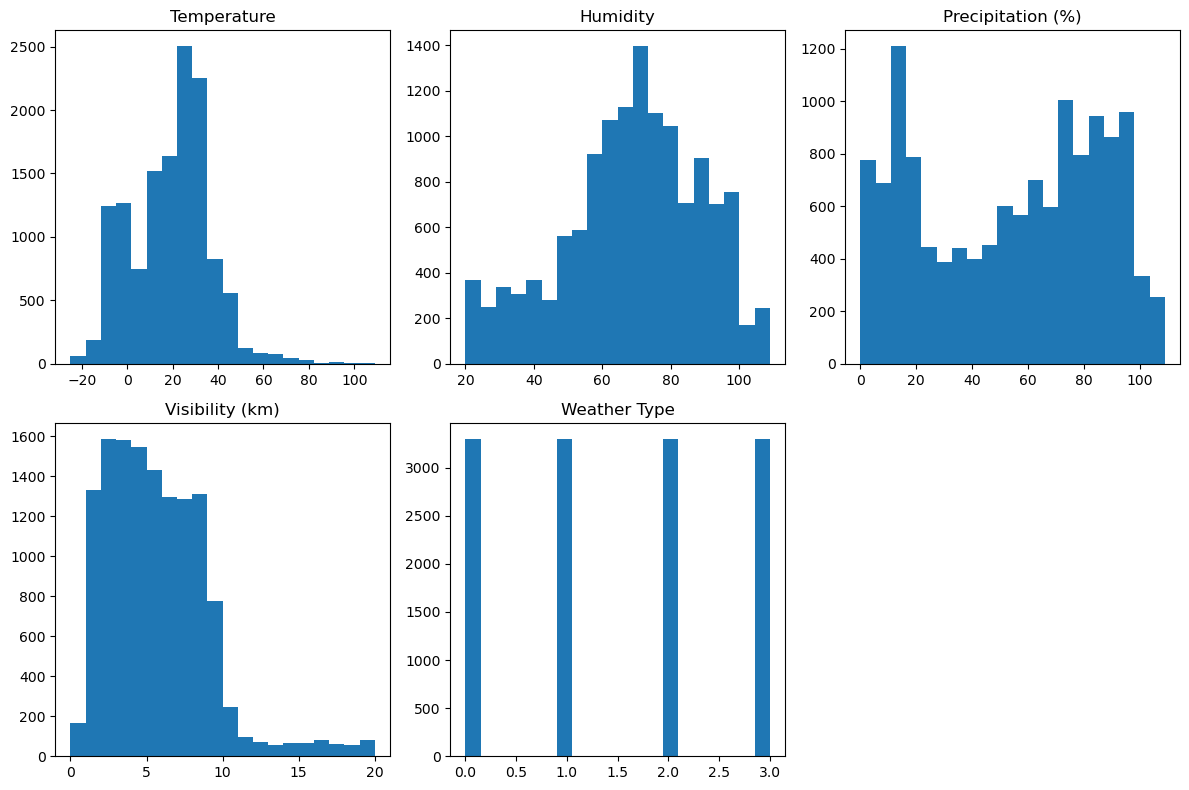

In [10]:
# Plotting histograms
weather_data_copy.hist(bins=20, figsize=(12, 8), layout=(2, 3), grid=False)
# Naming the axes
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Based on observing the histogram above, it can be seen that there are some outliers in temperature and the visibility.
 - For temperature we can bring all data to same scale degree celcius.
 - For visibility we can do log trasformation to nomalize the data.

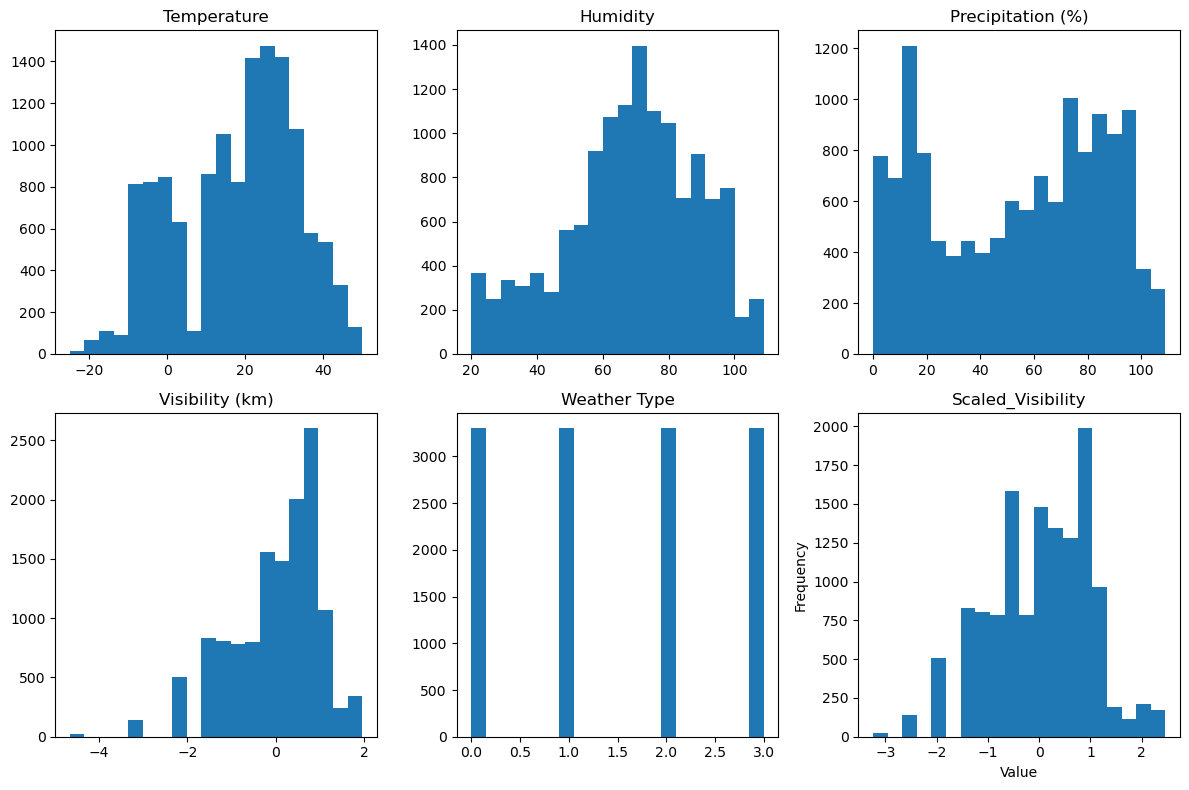

In [15]:
weather_data_copy['Temperature'] = weather_data_copy['Temperature'].apply(lambda x: (x - 32) * 5/9 if x > 50 else x)
weather_data_copy['Visibility (km)'] = np.log(weather_data_copy['Visibility (km)'] + 1)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the Visibility data
weather_data_copy['Visibility (km)'] = scaler.fit_transform(weather_data_copy[['Visibility (km)']])
weather_data_copy.hist(bins=20, figsize=(12, 8), layout=(2, 3), grid=False)
# Naming the axes
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Model Building

In [16]:
#X is set of independant variables
X = weather_data_copy.drop(['Weather Type'],  axis=1)


#y is target variable
y = weather_data_copy['Weather Type']

#### Split the data into traning and test set. Train = 80% and Test = 20%

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

LogisticRegression(max_iter=2000)

#### Traing model with logestic regression.

In [ ]:
model_LR = LogisticRegression(max_iter=2000) 
model_LR.fit(X_train, y_train)

#### Checking Prediction score.

In [28]:
predicted = model_LR.predict(X_test)
actual = y_test
accuracy_score(actual,predicted)

0.8045454545454546